# Analyze result based on original source dataframe.

In [1]:
# Set package root directory.
import os
os.environ['ML_FOR_SG_ROOT'] = 'Z:\Dev\Github\ml-for-sg'
import sys
sys.path.append(os.environ['ML_FOR_SG_ROOT'])
import pandas

# Set for inline graph.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from lib.resource.feature_analyzer import FeatureAnalyzer

In [2]:
feature_analyzer = FeatureAnalyzer()

In [3]:
# Dataframe of features without string description.
feature_analyzer.df_x_full

,assets__acorn,assets__alice,assets__anders,assets__backdrop,assets__banning,assets__billowy,assets__blue,assets__branch,assets__bunny,assets__bus,...,tail_in,tail_out,task_template,tasks__animation,tasks__comp,tasks__fx,tasks__layout,tasks__light,type,updated_by
bunny_010_0010,0,0,0,1,1,1,0,0,1,0,...,NaN,NaN,NaN,1,1,1,1,1,Shot,Shotgun Support
bunny_010_0040,1,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1,1,1,1,1,Shot,NaN
bunny_010_0050,0,0,1,0,0,0,1,1,0,0,...,NaN,NaN,NaN,1,1,1,1,1,Shot,NaN
bunny_010_0020,0,1,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,1,1,1,1,1,Shot,NaN
bunny_010_0030,0,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,1,1,1,1,1,Shot,NaN


In [4]:
# Dataframe of string description features.
feature_analyzer.df_x_text_full

,_i_,able,about,above,across,ada,added,adding,adoption,advice,...,yelp,yer,yes,yesterday,yet,you,your,yours,yourself,youth
bunny_010_0010,0,1,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,1,1,0,0
bunny_010_0040,1,1,1,0,1,1,0,0,0,1,...,1,0,0,0,0,1,1,1,1,0
bunny_010_0050,0,1,1,0,1,1,0,0,0,0,...,0,1,1,1,1,1,1,0,0,1
bunny_010_0020,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
bunny_010_0030,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0


In [5]:
# Dataframe of cost.
feature_analyzer.df_y_full

,cost
bunny_010_0010,19200
bunny_010_0020,9600
bunny_010_0030,12600
bunny_010_0040,18000
bunny_010_0050,17400


In [6]:
# Remove feature candidates based on null values.
df_x_remove_columns = feature_analyzer.generate_feature_delete_list_based_on_null_value(feature_analyzer.df_x_full)
print df_x_remove_columns

['cut_duration', 'cut_in', 'cut_out', 'filmstrip_image', 'head_duration', 'head_in', 'head_out', 'sg_shot_type', 'smart_cut_duration', 'smart_cut_in', 'smart_cut_out', 'smart_cut_summary_display', 'smart_duration_summary_display', 'smart_head_duration', 'smart_head_in', 'smart_head_out', 'smart_tail_duration', 'smart_tail_in', 'smart_tail_out', 'smart_working_duration', 'step_0', 'step_106', 'step_2', 'step_35', 'step_6', 'step_7', 'step_8', 'tail_duration', 'tail_in', 'tail_out', 'task_template', 'updated_by']


In [7]:
# Reduced dataframe based on candidates.
df_x_full = feature_analyzer.df_x_full.drop(df_x_remove_columns,axis=1)
print df_x_full

                assets__acorn  assets__alice  assets__anders  \
bunny_010_0010              0              0               0   
bunny_010_0040              1              0               0   
bunny_010_0050              0              0               1   
bunny_010_0020              0              1               0   
bunny_010_0030              0              0               0   

                assets__backdrop  assets__banning  assets__billowy  \
bunny_010_0010                 1                1                1   
bunny_010_0040                 0                0                0   
bunny_010_0050                 0                0                0   
bunny_010_0020                 0                0                0   
bunny_010_0030                 0                1                0   

                assets__blue  assets__branch  assets__bunny  assets__bus  \
bunny_010_0010             0               0              1            0   
bunny_010_0040             1              

In [8]:
# Remove feature candidates based on co-relationship with cost.
df_x_remove_columns2 = feature_analyzer.generate_feature_delete_list_based_on_cost_relation(feature_analyzer.df_x_full, rate=0.3)
print df_x_remove_columns2

['assets__alice', 'assets__anders', 'assets__banning', 'assets__branch', 'assets__bus', 'assets__car', 'assets__caterpillar', 'assets__darcy', 'assets__deserted', 'assets__fern', 'assets__flash', 'assets__flower', 'assets__forest', 'assets__island', 'assets__launcher', 'assets__leaf', 'assets__morning', 'assets__mouse', 'assets__mrs', 'assets__night', 'assets__pickup', 'assets__police', 'assets__scary', 'assets__school', 'assets__spoon', 'assets__squirrel', 'assets__stormy', 'assets__street', 'assets__submarine', 'assets__sunny', 'assets__tank', 'assets__top', 'assets__tractor', 'assets__trolley', 'assets__tunnel', 'sg_cut_duration', 'sg_cut_in', 'sg_cut_order', 'sg_cut_out', 'sg_tail_out', 'sg_working_duration']


In [9]:
# Reduced dataframe based on candidates.
df_x_full = feature_analyzer.df_x_full.drop(df_x_remove_columns2,axis=1)
print df_x_full

                assets__acorn  assets__backdrop  assets__billowy  \
bunny_010_0010              0                 1                1   
bunny_010_0040              1                 0                0   
bunny_010_0050              0                 0                0   
bunny_010_0020              0                 0                0   
bunny_010_0030              0                 0                0   

                assets__blue  assets__bunny  assets__butterfly  assets__cliff  \
bunny_010_0010             0              1                  0              0   
bunny_010_0040             1              0                  1              1   
bunny_010_0050             1              0                  0              1   
bunny_010_0020             0              0                  0              0   
bunny_010_0030             0              0                  0              0   

                assets__clouds  assets__crow  assets__ext       ...         \
bunny_010_0010            

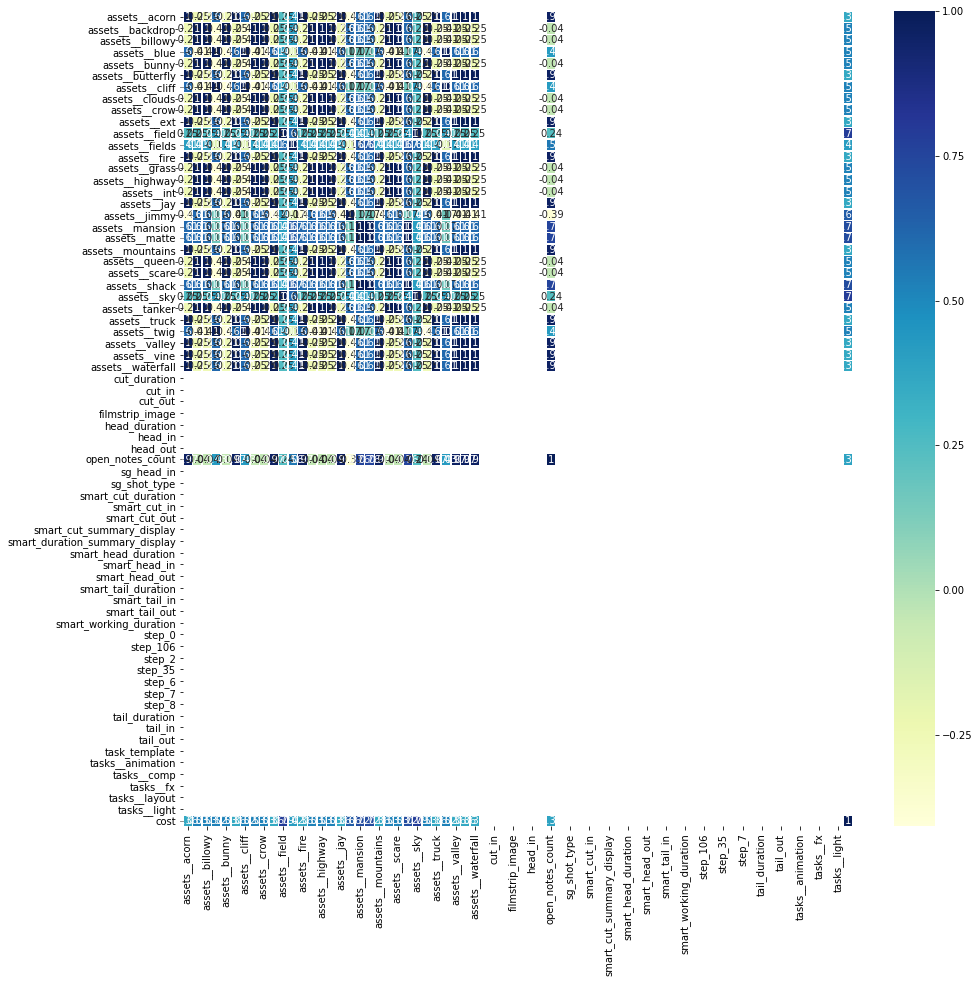

In [10]:
# Generate heatmap based on reduced dataframe.
df_full = pandas.concat([df_x_full, feature_analyzer.df_y_full], axis=1)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_full.corr(), annot=True, linewidths=.5, cmap='YlGnBu')

In [11]:
# Remove feature candidates based on co-relationship with cost.
df_x_text_remove_columns = feature_analyzer.generate_feature_delete_list_based_on_cost_relation(feature_analyzer.df_x_text_full, rate=0.7)
print df_x_text_remove_columns

['_i_', 'above', 'across', 'ada', 'added', 'adding', 'adoption', 'advice', 'against', 'age', 'ahem', 'airs', 'alarm', 'alices', 'allow', 'almost', 'alone', 'along', 'altoget', 'altogether', 'always', 'among', 'angrily', 'angry', 'annoyed', 'anxiously', 'anything', 'appeared', 'apple', 'arm', 'arms', 'arranged', 'ashamed', 'asking', 'attending', 'avoid', 'away', 'bad', 'bank', 'bark', 'bathing', 'bats', 'beasts', 'beautifully', 'because', 'bed', 'bee', 'been', 'before', 'begun', 'behind', 'being', 'believe', 'bend', 'besides', 'best', 'better', 'bill', 'bills', 'birds', 'bit', 'blow', 'bones', 'book', 'books', 'bottle', 'box', 'brain', 'branches', 'bright', 'brightened', 'bring', 'bringing', 'broken', 'burn', 'busy', 'buttercup', 'butterfly', 'by', 'cake', 'cakes', 'called', 'came', 'candle', 'capital', 'care', 'carefully', 'case', 'catch', 'catching', 'caterpillar', 'certain', 'certainly', 'change', 'changes', 'changing', 'charges', 'cheated', 'child', 'children', 'chimney', 'choked', 

In [12]:
# Reduced dataframe based on candidates.
df_x_text_full = feature_analyzer.df_x_text_full.drop(df_x_text_remove_columns,axis=1)
print df_x_text_full

                able  about  afraid  after  again  air  alice  all  am  an  \
bunny_010_0010     1      1       1      1      1    1      1    1   1   1   
bunny_010_0040     1      1       1      1      1    1      1    1   1   1   
bunny_010_0050     1      1       1      1      1    1      1    1   1   1   
bunny_010_0020     1      1       0      1      1    0      1    1   1   1   
bunny_010_0030     1      1       1      1      1    1      1    1   1   1   

                ...    we  went  what  wit  with  ye  yelp  you  your  yours  
bunny_010_0010  ...     1     1     1    1     1   1     1    1     1      1  
bunny_010_0040  ...     1     1     1    1     1   1     1    1     1      1  
bunny_010_0050  ...     1     1     1    1     1   1     0    1     1      0  
bunny_010_0020  ...     1     0     1    1     1   1     0    1     1      0  
bunny_010_0030  ...     1     1     1    1     1   1     0    1     1      0  

[5 rows x 192 columns]


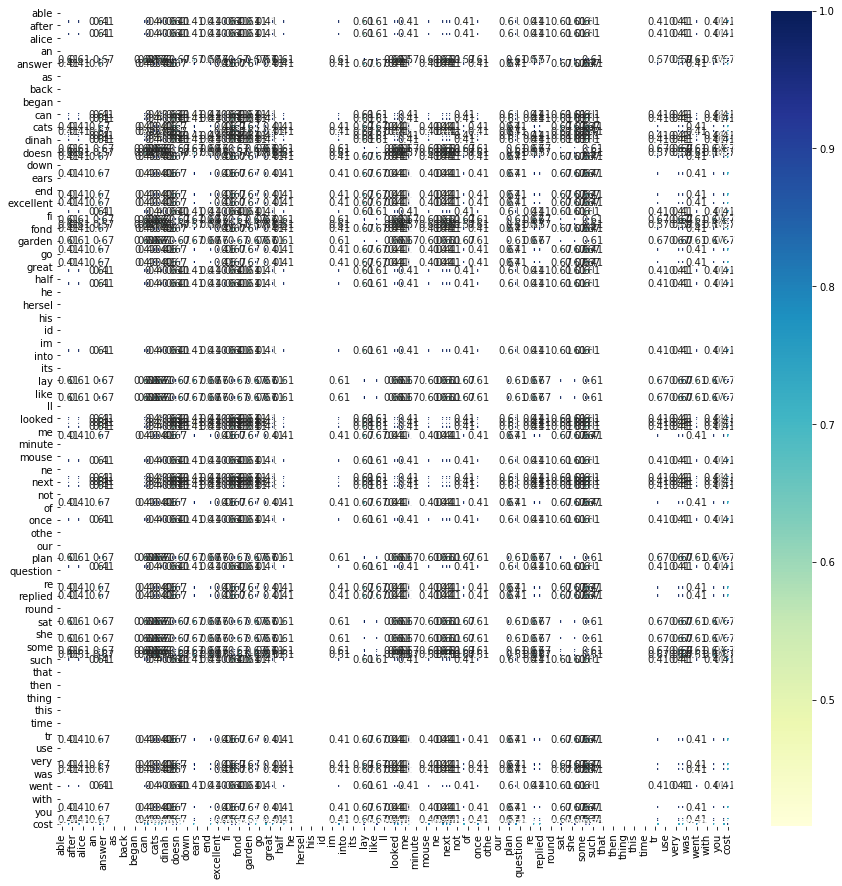

In [13]:
# Generate heatmap based on reduced dataframe.
df_full = pandas.concat([df_x_text_full, feature_analyzer.df_y_full], axis=1)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_full.corr(), annot=True, linewidths=.5, cmap='YlGnBu')

In [14]:
# For updating configure,
# please update df_x_remove_columns, df_x_remove_columns2 and df_x_text_remove_columns
# and execute below.
from lib.resource.resource_handler import ResourceHandler
resource_handler = ResourceHandler()
data = {
    'skip_feature_for_df_x_full': df_x_remove_columns + df_x_remove_columns2,
    'skip_feature_for_df_x_text_full': df_x_text_remove_columns
}
resource_handler.save_source_convert_config(data)